In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import itertools

In [2]:

# def generate_combinations(n, s):
#     # Create a range from 1 to n (inclusive)
#     numbers = range(1, n + 1)
    
#     # Generate all combinations of length s
#     combinations = list(itertools.combinations(numbers, s))
    
#     return combinations

In [3]:
A= np.load('BIBD91.npy')
# A = np.load('srg_126_25_8_4.npy')
# q = 9
# n_1 = q**2 +q+ 1
# n_2 = q**2 +q+ 1
# d_1 = q+1
# d_2 = q+1
# K = designs.projective_plane(q)
# A = np.array(K.incidence_matrix())



# n1 = 8
# n2 = n1
# d1 = 1
# d2 = 1
# A = np.eye(n1)


# K = designs.balanced_incomplete_block_design(37, 10, 5)
# A = K.incidence_matrix()
# A = np.array(A).T

n_1 = A.shape[0]
n_2 = A.shape[1]
d_1 = (A@A.T)[0,0]
d_2 = (A.T@A)[0,0]

# #m = 3
# k = 1

RR = A.T@A
lmd = RR[0,1]

# lmd = 8
# mu = 4



In [4]:
print(n_2,n_1,d_2,d_1, lmd)

91 91 10 10 1


In [5]:
A.T@A

array([[10,  1,  1, ...,  1,  1,  1],
       [ 1, 10,  1, ...,  1,  1,  1],
       [ 1,  1, 10, ...,  1,  1,  1],
       ...,
       [ 1,  1,  1, ..., 10,  1,  1],
       [ 1,  1,  1, ...,  1, 10,  1],
       [ 1,  1,  1, ...,  1,  1, 10]], dtype=int64)

In [6]:

m = 2

F = np.kron(np.eye(m), np.ones((n_1,1)))
# E = np.sqrt(1/2)*A
# for i in range(m-1):
#     E = np.vstack((E,np.sqrt(1/2)*A))
E = np.vstack((A,A))

In [7]:
E.shape

(182, 91)

In [8]:

p = 15
n_w = E.shape[1]
n_p = n_1
s_list= np.linspace(0, (.25*(n_w)), p + 1, dtype=int)[1:]

frac_stragglers = s_list/n_w



In [9]:

# opt_err_array = np.zeros((len(s_list), itr))
# opt_max = np.zeros(len(s_list))
# opt_min = np.zeros(len(s_list))

# opt_err_array_1 = np.zeros((len(s_list), itr))
# opt_max_1 = np.zeros(len(s_list))
# opt_min_1 = np.zeros(len(s_list))

# exp_opt_err_array_1 = np.zeros((len(s_list), itr))
# exp_max_1 = np.zeros(len(s_list))
# exp_min_1 = np.zeros(len(s_list))

In [10]:
d_choices = 100
itr = 1000

In [11]:
exp_opt_error = np.zeros((len(s_list)))
exp_fixed_diag = np.zeros((len(s_list), d_choices))

In [12]:
# x = np.linspace(0 , 1 , 10001)[1:]
# uniform = np.sort(np.concatenate((x, -1*x)))
# a_p = (1/len(uniform))*np.ones((len(uniform)))

In [13]:

for i in range(len(s_list)):
    l = 0
    for k in range(d_choices):
            #print(i,k)
            #print("diags")
            #print("AHHHHHHHH")
           
            #d_v_1 = np.random.randn(n_2)
            #d_v_1 = np.random.choice(uniform, size= (n_2), p=a_p)
            #print(d_v_1)
            #d_v_1 = np.random.choice([-1/4,-1/2, 1/2, 1/4], size= (n_2), p=[0.35, 0.15, 0.15, 0.35])
            #d_v_2 = np.sqrt(1 - d_v_1**2)
            #d_v_2 = np.random.randn(n_2)
           
            #d_v_2 = np.random.choice(uniform, size= (n_2), p=a_p)
            #print(d_v_2)
            #d_v_2 = np.random.choice([-1/4,-1/2, 1/2, 1/4], size= (n_2), p=[0.25, 0.25, 0.25, 0.25])
            
            # D3 = np.diag(np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5]))
            
            
            # D2 = np.random.randn(n_1,n_2)
            #D2 = np.random.choice([-1, 1], size=(n_1, n_2))
            #D1 = np.random.randn(n_1,n_2)
            #D2 = np.random.randn(n_1,n_2)
            # D3 = np.diag(np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5]))
            # D4 = np.diag(np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5]))
            # E1 = np.vstack((A,np.multiply(A,D2)))

        
            np.random.seed(k)
            d_v_1 = np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5])
            D1 = np.diag(d_v_1)
            d_v_2 = np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5])
            D2 = np.diag(d_v_2)
            E1 = np.vstack((A@D1, A@D2))

            c = 0
            for j in range(itr): 
                    #print(i,j)
                    np.random.seed(j+k)
                    random_non_stragglers = np.random.choice(np.arange(0, n_w), int(n_w-s_list[i]), replace=False)
                    random_non_stragglers = np.sort(random_non_stragglers)
                    E_F_1 = E1[:, random_non_stragglers]
        #             print(random_non_stragglers.shape)
                    #print(random_non_stragglers)
                    opt_err = 0
                    opt_err_1 = 0
                    exp_opt_err_1 = 0
                    
                    for t in range(F.shape[1]):
        #                       z = H[t, :].conj().T
        #                       z =  np.reshape(z, (m,1)) 
        #                       b = (1/m) *(H@z)
        #                       b = np.reshape(b, (m,1)) 
                              a = F[:,t]
                              a = np.reshape(a, (m*n_p,1))
                              #print(a)
        
        
                              #E_F = E[:, random_non_stragglers]
                             
        #                       D1_tilde = D1[np.ix_(random_non_stragglers, random_non_stragglers)]
        #                       D2_tilde = D2[np.ix_(random_non_stragglers, random_non_stragglers)]
        #                       #print(D1_tilde)
        #                       A_F = A[:, random_non_stragglers]
        #                       p = np.ones((n1,1))
        #                       print(a.shape)
        #                       print(p.shape)
        #                       print(A_F.shape)
        #                       print(D2_tilde.shape)
                              #opt_err = opt_err + a.T@a-a.T@E_F@ np.transpose(np.linalg.inv(np.transpose(E_F)@E_F))@E_F.T@a
                              x, residuals, rank, s = np.linalg.lstsq(E_F_1, a, rcond=None)
                              opt_err_1 = opt_err_1 + np.linalg.norm(E_F_1@x-a,2)**2
                              # opt_err_1 = opt_err_1 + a.conj().T@a-a.conj().T@E_F_1@ np.linalg.inv(E_F_1.conj().T@E_F_1).conj().T@E_F_1.conj().T@a  
                              #opt_err = opt_err + a.conj().T@a-a.conj().T@E_F@ np.linalg.inv(E_F.conj().T@E_F).conj().T@E_F.conj().T@a
        #                       exp_opt_err_1 = exp_opt_err_1 + a.T@a - a.T@E_F_1@np.linalg.inv(D1_tilde.T@A_F.T@A_F@D1_tilde +D2_tilde.T@A_F.T@A_F@D2_tilde)@E_F_1.T@a 
        # #                       exp_opt_err_1 = exp_opt_err_1 + a.T@a - p.T@A_F@np.linalg.inv(A_F.T@A_F+A_F.T@A_F)@A_F.T@p 
                              #print(np.imag(opt_err))  
        
                    #print(opt_err_1.item())
                    #opt_err_array[i,j] = np.sqrt((np.real(opt_err.item())))
                    c = c +  ((np.real(opt_err_1.item())))
                    #opt_err_array_1[i,j] = np.sqrt((np.real(opt_err_1.item())))
                    #exp_opt_err_array_1[i,j] = np.sqrt((np.real(exp_opt_err_1.item())))
        #             ss = np.zeros(m)
        #             prt = np.zeros(m)
        #             for g in range(m):
        #                 ss[g] = n2- ((random_non_stragglers >= g*n2) & (random_non_stragglers < (g+1)*n2 )).sum()
        #                 prt[g] =((n2 - ss[g])/(d2 +lmd*( n2 - ss[g] - 1)))
        
                    #print(ss)
                    #print(ss.sum())
                    #print(prt)
                     
            
            #print(c)
            exp_fixed_diag[i,k] = c/itr 
            l = l+c 
            #print(l)
            # opt_max[i] = np.max(opt_err_array[i,:])
            # opt_min[i] = np.min(opt_err_array[i, :])
            # opt_max_1[i] = np.max(opt_err_array_1[i,:])
            # opt_min_1[i] = np.min(opt_err_array_1[i, :])
            
            # exp_max_1[i] = np.max(exp_opt_err_array_1[i,:])
            # exp_min_1[i] = np.min(exp_opt_err_array_1[i,:])
        
        
        
    exp_opt_error[i] = l/(d_choices*itr)    
    #print("avg")
    #print(exp_opt_error[i])


In [14]:
new_lower_bound = np.zeros((len(s_list)))
lb = np.zeros((m))
for i in range(len(s_list)):
  for j in range(m):
      lb[j] = np.floor((s_list[i] + m - j -1)/d_2) * (j+1)
  new_lower_bound[i] = np.max(lb) 

In [15]:
opt_err_array = np.zeros((len(s_list), itr))
opt_max = np.zeros(len(s_list))
opt_min = np.zeros(len(s_list))
opt_avg = np.zeros(len(s_list))

In [16]:
for i in range(len(s_list)):
    for j in range(itr):
            #print(i,j)
            np.random.seed(78+j)
            # random_non_stragglers = np.random.choice(np.arange(0, n_w), int(n_w-s_list[i]), replace=False)
            random_stragglers = np.random.choice(np.arange(0, int(n_w)), int(s_list[i]), replace=False)
            random_non_stragglers = np.setdiff1d(np.arange(0, n_w),random_stragglers)
            random_non_stragglers = np.sort(random_non_stragglers)
            E_F = E[:, random_non_stragglers]
            # E_F_1 = E1[:, random_non_stragglers]
            # E_F_2 = E2[:, random_non_stragglers]
            # P_F = P[:, random_non_stragglers]
            # Q_F = Q[:, random_non_stragglers]
            # R_F = R[:, random_non_stragglers]
            # E_F_3 = E3[:, random_non_stragglers]
            #print(random_non_stragglers.shape)
            #print(random_non_stragglers)
            #print(E_F.shape)
            #print(E_F_1.shape)
            opt_err = 0
            # opt_err_1 = 0
            # opt_err_2 = 0
            # opt_err_3 = 0

            for t in range(m):

                      a = F[:,t]
                      a = np.reshape(a, (m*n_p,1))

                      #print(a)
                      # print(a.conj().T@a-a.conj().T@E_F@ np.linalg.inv(E_F.conj().T@E_F).conj().T@E_F.conj().T@a)



                      #opt_err = opt_err + a.T@a-a.T@E_F@ np.transpose(np.linalg.inv(np.transpose(E_F)@E_F))@E_F.T@a
                      # s1 = a.conj().T@a-a.conj().T@E_F@ np.linalg.inv(E_F.conj().T@E_F).conj().T@E_F.conj().T@a
                      # opt_err = opt_err + a.conj().T@a-a.conj().T@E_F@ np.linalg.inv(E_F.conj().T@E_F).conj().T@E_F.conj().T@a
                      x, residuals, rank, s = np.linalg.lstsq(E_F, a, rcond=None)
                      opt_err = opt_err + np.linalg.norm(E_F@x-a,2)**2
                      # x, residuals, rank, s = np.linalg.lstsq(E_F_1, a, rcond=None)
                      # opt_err_1 = opt_err_1 + np.linalg.norm(E_F_1@x-a,2)**2
                      # x, residuals, rank, s = np.linalg.lstsq(E_F_2, a, rcond=None)
                      # opt_err_2 = opt_err_2 + np.linalg.norm(E_F_2@x-a,2)**2
                      #print(residuals)
                      # opt_err_2 = opt_err_2 + a.conj().T@a-a.conj().T@E_F_2@ np.linalg.inv(E_F_2.conj().T@E_F_2).conj().T@E_F_2.conj().T@a



                      # print('norm')
                      # print(np.linalg.norm(E_F.conj().T@a, 2))
                      # print('eig')
                      # print(np.sort(np.linalg.eigvals(E_F.T@E_F))[-1])
                      # print(((np.linalg.norm(E_F.conj().T@a, 2)**2 )/np.sort(np.linalg.eigvals(E_F.T@E_F))[-1]))
                      #print(np.sort(np.linalg.eigvals(E_F.T@E_F))[-1])
                      #opt_err_1 = opt_err_1 + a.conj().T@a-a.conj().T@E_F_1@ np.linalg.inv(E_F_1.conj().T@E_F_1).conj().T@E_F_1.conj().T@a
                      # x, residuals, rank, s = np.linalg.lstsq(E_F_2, a, rcond=None)
                      # print(residuals)
                      # # opt_err_2 = opt_err_2 + a.conj().T@a-a.conj().T@E_F_2@ np.linalg.inv(E_F_2.conj().T@E_F_2).conj().T@E_F_2.conj().T@a
                      # if residuals.size > 0:
                      #   opt_err_2 = opt_err_2 + residuals[0]
                      # else:
                      #     opt_err_2 = opt_err_2 + 0


                      # opt_err_3 = opt_err_3 + a.conj().T@a-a.conj().T@E_F_3@ np.linalg.inv(E_F_3.conj().T@E_F_3).conj().T@E_F_3.conj().T@a
                      #print(np.imag(opt_err))

            #print(opt_err.item())
            opt_err_array[i,j] = (np.real(opt_err))
            # opt_err_array_1[i,j] = (np.real(opt_err_1))
            # opt_err_array_2[i,j] = (np.real(opt_err_2))
            # # tilde_p = P_F.T@P_F + Q_F.T@Q_F
            # tilde_p = P_F.T@P_F + Q_F.T@Q_F +  R_F.T@R_F
            # tilde_A =  np.diag(np.diag(tilde_p) + np.sum(np.abs(tilde_p), axis=1) - np.abs(np.diag(tilde_p)))


            # b_opt_err_array[i,j] = m*n_p - ones.T@P_F@la.inv(tilde_A)@P_F.T@ones - ones.T@Q_F@la.inv(tilde_A)@Q_F.T@ones-  ones.T@R_F@la.inv(tilde_A)@R_F.T@ones
            # opt_err_array_1[i,j] = (np.real(opt_err_1.item()))
            # opt_err_array_2[i,j] = opt_err_2
            # opt_err_array_3[i,j] = (np.real(opt_err_3.item()))
            # ss = np.zeros(m)
            # prt = np.zeros(m)
            # for g in range(m):
            #     ss[g] = int(n_2/m)- ((random_non_stragglers >= g*(int(n_2/m))) & (random_non_stragglers < (g+1)*(int(n_2/m)) )).sum()
            #     prt[g] =((int(n_2/m) - ss[g])/(d_2 +lmd*( int(n_2/m) - ss[g] - 1)))
            # exp_err_array_3[i, :] = m*n_p - (d_2^2)*np.sum(prt)

            #print(ss)
            #print(ss.sum())
            #print(prt)



    opt_max[i] = np.max(opt_err_array[i,:])
    opt_min[i] = np.min(opt_err_array[i, :])
    opt_avg[i] = np.mean(opt_err_array[i, :])

    # opt_max_1[i] = np.max(opt_err_array_1[i,:])
    # opt_min_1[i] = np.min(opt_err_array_1[i, :])
    # opt_avg_1[i] = np.mean(opt_err_array_1[i, :])

    # opt_max_2[i] = np.max(opt_err_array_2[i,:])
    # opt_min_2[i] = np.min(opt_err_array_2[i, :])
    # opt_avg_2[i] = np.mean(opt_err_array_2[i, :])

    # b_opt_max[i] = np.max(b_opt_err_array[i,:])
    # b_opt_min[i] = np.min(b_opt_err_array[i, :])
    # b_opt_avg[i] = np.mean(b_opt_err_array[i, :])
    # opt_max_3[i] = np.max(opt_err_array_3[i,:])
    # opt_min_3[i] = np.min(opt_err_array_3[i, :])
#     exp_max[i] = np.max(exp_opt_err_array[i, :])
#     exp_min[i] = np.min(exp_opt_err_array[i, :])





In [17]:
exp_bound_bernoulli = (m*n_p - ((m*d_2**2*(n_w-s_list))/((m*d_2 - lmd) + lmd*(n_w-s_list))))
# exp_bound_bernoulli = (m*n_p - ((m*d_2**2*(n_w-s_list))/((m*d_2 - mu) + mu*(n_w-s_list)+ (lmd - mu)*d_2)))

In [18]:
opt_trivial = (m*n_p - ((d_2**2*(n_w-s_list))/((d_2 - lmd) + lmd*(n_w-s_list))))

In [19]:
s_list

array([ 1,  3,  4,  6,  7,  9, 10, 12, 13, 15, 16, 18, 19, 21, 22])

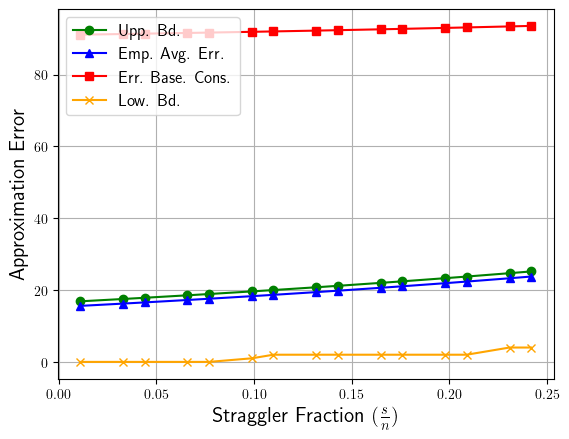

In [23]:

plt.plot(frac_stragglers,exp_bound_bernoulli, color = 'green', marker ='o', label = r'Upp. Bd.')
plt.plot(frac_stragglers, exp_opt_error, color = 'blue', marker ='^', label = 'Emp. Avg. Err.')
plt.plot(frac_stragglers, opt_avg, color = 'red', marker ='s', label = 'Err. Base. Cons.')
plt.plot(frac_stragglers, new_lower_bound, color = 'Orange', marker ='x', label = 'Low. Bd.')



plt.xlabel(r'Straggler Fraction $(\frac{s}{n})$', fontsize = 15)
plt.ylabel('Approximation Error', fontsize = 15)
plt.legend(fontsize='large',loc='upper left')
plt.rc('text', usetex=True)
plt.grid(True)
#plt.title('Approximation Error vs Fraction of Workers Straggling', fontsize = 15)
plt.savefig('ISIT_2025_plot_1(91,91,10,10)_BIBD_v_2.pdf')

In [21]:
s_list

array([ 1,  3,  4,  6,  7,  9, 10, 12, 13, 15, 16, 18, 19, 21, 22])

In [ ]:
exp_bound_bernoulli

In [ ]:
A.shape